In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 22423129.62it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 622124.33it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 5652168.30it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3534420.92it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data, batch_size = 100, shuffle = True, num_workers=1),
    'test' : DataLoader(test_data, batch_size = 100, shuffle = True, num_workers=1),
}

In [8]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7e00340756c0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7e0034076bf0>}

In [9]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)

    return F.log_softmax(x)

In [12]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print(f'\nTest set: Average Set: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)}({100. * correct / len(loaders["test"].dataset):.0f}%\n)')


In [13]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-9-f6ca335473cf>:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.309124
Train Epoch: 1 [2000/60000 (3%)]	2.198830
Train Epoch: 1 [4000/60000 (7%)]	1.829269
Train Epoch: 1 [6000/60000 (10%)]	1.085919
Train Epoch: 1 [8000/60000 (13%)]	1.006808
Train Epoch: 1 [10000/60000 (17%)]	0.696211
Train Epoch: 1 [12000/60000 (20%)]	0.537424
Train Epoch: 1 [14000/60000 (23%)]	0.571821
Train Epoch: 1 [16000/60000 (27%)]	0.695793
Train Epoch: 1 [18000/60000 (30%)]	0.668270
Train Epoch: 1 [20000/60000 (33%)]	0.689914
Train Epoch: 1 [22000/60000 (37%)]	0.624319
Train Epoch: 1 [24000/60000 (40%)]	0.545413
Train Epoch: 1 [26000/60000 (43%)]	0.579588
Train Epoch: 1 [28000/60000 (47%)]	0.480753
Train Epoch: 1 [30000/60000 (50%)]	0.379445
Train Epoch: 1 [32000/60000 (53%)]	0.376396
Train Epoch: 1 [34000/60000 (57%)]	0.414878
Train Epoch: 1 [36000/60000 (60%)]	0.575276
Train Epoch: 1 [38000/60000 (63%)]	0.414092
Train Epoch: 1 [40000/60000 (67%)]	0.396564
Train Epoch: 1 [42000/60000 (70%)]	0.369228
Train Epoch: 1 [44000/60000 (73%)]	0.315632

<ipython-input-9-f6ca335473cf>:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Prediction: (prediction)


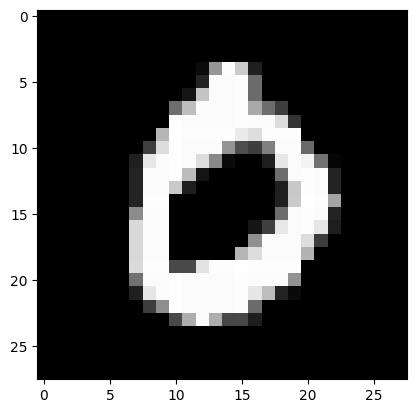

In [14]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[3]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: (prediction)')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()